# Tarea 4

## Implemenar una red neuronal utilizando Keras

En esta tarea vas a desarrollar una red neuronal utilizando el conjunto de datos Iris. 

En la clase 6 revisamos brevemente este dataset, si aún no tienes claro qué variables son dependientes e independientes puedes revisar la documentación del [dataset](https://archive.ics.uci.edu/ml/datasets/iris). 

La finalidad de esta tarea no es que encuentres el mejor modelo (aunque sería bueno que experimentes y encuentres uno bueno) si no que te familiarices con el uso de [Keras](https://keras.io/) y aprendas a utilizar su documentación.

En cada ejercicio agrega las celdas que necesites.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## I. Preparación de los datos

### Ejercicio 1:

1.1 Carga el [conjunto de datos Iris desde sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html)

1.2 Guarda los rasgos del conjunto de datos en la variable X

1.3 Guarda la salida del conjunto de datos en la variable y

Nota: Asegurate de tener instalada la libreria de sklearn

In [2]:
from sklearn import datasets

# importamos los datos
data = datasets.load_iris()

# data resulta ser un dictionary
X = data['data']        # input
y = data['target']      # output

### Ejercicio 2

2.1 Verifica que el tipo de dato de X y y es un arreglo

2.2 Convierte los arreglos a dataframes de pandas y concatenalos para tener un dataframe como el siguiente:

| sepal_length | sepal_width | petal_length | petal_width | target |
| --- | --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 | 0 |
| 4.9 | 3.0 | 1.4 | 0.2 | 0 |

Hint: 

Si no sabes cómo convertir un arreglo en dataframe puedes buscar en google algo así: *how to convert numpy array to dataframe pandas*

Puedes generar un dataframe para las X y uno para las y y despues *juntarlos*. Si no sabes cómo hacer esto, puedes buscar una [cheat sheet de pandas](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf). (En particular puedes utilizar merge sobre el indice de los dataframes creados).

In [3]:
# mostramos data type y shape de los arreglos X e y
print(f'Data type of X: {type(X)}, shape: {X.shape}.')
print(f'Data type of y: {type(y)}, shape: {y.shape}.')

Data type of X: <class 'numpy.ndarray'>, shape: (150, 4).
Data type of y: <class 'numpy.ndarray'>, shape: (150,).


In [4]:
# creamos un dataframe con el array X
# las etiquetas de las columnas seran los del dataset: data['feature_names']
df = pd.DataFrame(X, columns=data['feature_names'])
# anadimos una columna para el target
df['target'] = y

In [5]:
# mostramos el dataframe resultante
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Ejercicio 3

3.1 Los datos estan ordenados de alguna manera?, si es así reordenalos de manera aleatoria. 

3.2 Utiliza el método describe para generar una tabla con información estadística

Los datos estan ordenados tal que los primeros 50 datos corresponden a la clase 0 (setosa), los siguientes 50 a la clase 1 (versicolor) y los ultimos 50 a la clase 2 (virginica). Si no reordenaramos las muestras, el dataset estaria sesgado y el entrenamiento no daria buenos resultados.

In [6]:
# reordenamos aleatoriamente
df = df.sample(frac=1)

# mostramos 10 primeros elementos
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
35,5.0,3.2,1.2,0.2,0
85,6.0,3.4,4.5,1.6,1
25,5.0,3.0,1.6,0.2,0
45,4.8,3.0,1.4,0.3,0
113,5.7,2.5,5.0,2.0,2
44,5.1,3.8,1.9,0.4,0
123,6.3,2.7,4.9,1.8,2
4,5.0,3.6,1.4,0.2,0
87,6.3,2.3,4.4,1.3,1
109,7.2,3.6,6.1,2.5,2


In [7]:
# tabla con resumen estadistico
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Ejercicio 4

Realiza los histogramas de cada variable en el dataframe

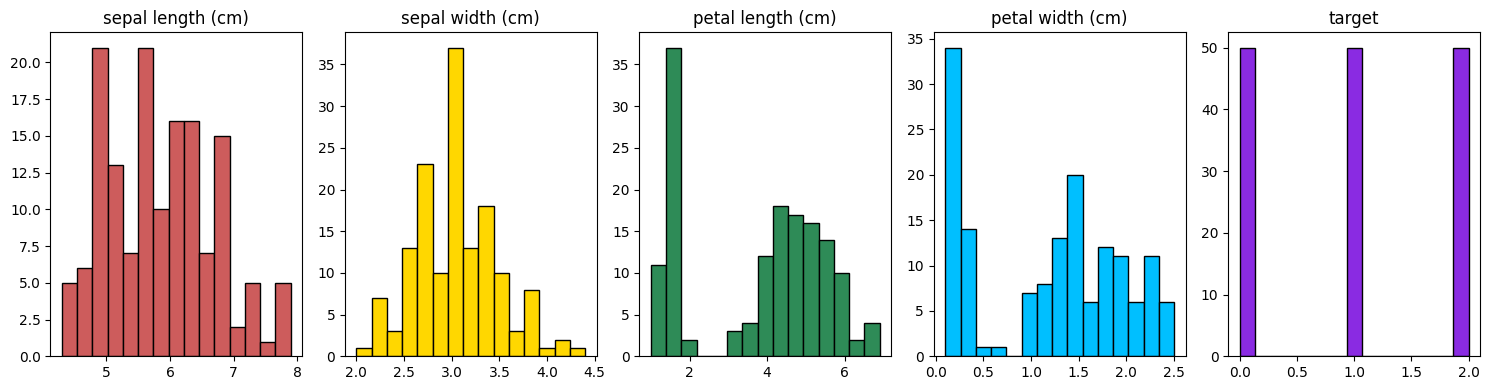

In [8]:
import matplotlib.pyplot as plt

features = df.columns
colors = ['indianred', 'gold', 'seagreen', 'deepskyblue', 'blueviolet']
# graficamos los histogramas
fig, axes = plt.subplots(1, 5, figsize=(15,4))
for i, (feature, ax) in enumerate(zip(features, axes)):
    ax.hist(df[feature], bins=15, color=colors[i], ec='black')
    ax.set_title(feature)
plt.tight_layout()
plt.show()

### Ejercicio 5 

5.1 Separa el conjunto de datos en los conjuntos de entrenamiento (90%) y de prueba (10%). Muestra cuántas muestras tiene cada conjunto

5.2 Separa las variables independientes de las variables dependientes para el conjunto de prueba y el conjunto de entrenamiento. Revisa las dimensiones de cada conjunto

5.3 Normaliza los datos de entrenamiento y prueba (solo normaliza a las variables independientes)


In [9]:
train_ratio = 0.9                           # razon de las muestras empleadas para entrenamiento
n_samples   = X.shape[0]                    # numero total de muestras
train_size  = round(train_ratio*n_samples)  # numero de muestras para entrenamiento

# DataFrames con los datos para entrenamiento y prueba
df_train = df.iloc[:train_size,:]
df_test  = df.iloc[train_size:,:]

# imprimimos el tamano de cada subconjunto
print(f'Numero de muestras para entrenamiento: {df_train.shape[0]}')
print(f'Numero de muestras para prueba: {df_test.shape[0]}')

Numero de muestras para entrenamiento: 135
Numero de muestras para prueba: 15


In [10]:
# separamos las variables dependientes e independientes del conjunto de datos
X_train, y_train = df_train.values[:,:-1], df_train.values[:,-1]
X_test, y_test   = df_test.values[:,:-1], df_test.values[:,-1]

print(f'Dimensiones de los subconjuntos: ')
print('Variables independientes del conjunto de entrenamiento: ', X_train.shape)
print('Variables dependientes del conjunto de entrenamiento: ', y_train.shape)
print('Variables independientes del conjunto de prueba: ', X_test.shape)
print('Variables dependientes del conjunto de prueba: ', y_test.shape)

Dimensiones de los subconjuntos: 
Variables independientes del conjunto de entrenamiento:  (135, 4)
Variables dependientes del conjunto de entrenamiento:  (135,)
Variables independientes del conjunto de prueba:  (15, 4)
Variables dependientes del conjunto de prueba:  (15,)


In [11]:
# podemos usar sklearn.preprocessing.StandardScaler para la normalizacion
from sklearn.preprocessing import StandardScaler

# normalizacion
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)     # calcula la media y la std de X_train y luego lo normaliza
X_test  = scaler.transform(X_test)          # transforma X_test

## II. Implementación de la red neuronal

In [12]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.losses import SparseCategoricalCrossentropy
from keras import initializers
np.random.seed(1)

2023-03-17 10:57:52.275204: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-17 10:57:52.401498: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-17 10:57:52.404049: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-17 10:57:52.404060: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

### Ejercicio 7

Implementa una red neuronal con dos capas ocultas. Completa la función **architecture** que define la arquitectura.

Cúantos nodos debe tener la capa de entrada?

Cuántos valores posibles puede tomar la variable **target**? Esto define el número de clases que tienes, y por lo tanto, el número de nodos en la capa de salida

En este caso vamos a realizar una clasificación (veremos a detalle esto en las siguientes clases) porque tenemos un target categorico, por lo que la última capa debe tener tantos nodos como salidas o clases.

Nota: si crees que el modelo funciona mejor con más o menos capas, modifica la función para agregar las capas que desees.

- La capa de entrada tiene el mismo numero de nodos que el numero de rasgos/caracteristicas: es decir 4.
- La variable target puede tomar 3 valores (0, 1, 2).

In [13]:
def architecture(n_hidden1, n_hidden2, initializer, activation, input_shape):
    
    model = Sequential()
    
    n_features = input_shape

    # no incluimos explicitamente la capa de entrada en la arquitectura
    # primera capa oculta (4 nodos -> n_hidden1 nodos)
    model.add(Dense(units = n_hidden1,                  # units da el número de nodos 
                    kernel_initializer = initializer,   # Initiallizacion de los pesos W
                    bias_initializer = 'zeros',         # Inicialización del bias
                    activation = activation,            # Función de activación
                    input_shape = input_shape))         # Da el numero de nodos de la capa de entrada.
                                                        # Este número corresponde al número de rasgos X que definen
                                                        # al sistema de estudio
    
    # segunda capa oculta (n_hidden1 nodos -> n_hidden2 nodos)
    model.add(Dense(units = n_hidden2,
                    kernel_initializer = initializer,
                    bias_initializer = 'zeros',
                    activation = activation,))
    
    # capa de salida (n_hidden2 nodos -> 3 nodos)
    model.add(Dense(units = 3,
                    kernel_initializer = initializer,
                    bias_initializer = 'zeros',
                    activation = 'softmax'))
    
    return model

### Ejercicio 8

8.1 Llama a la función architecture para definir el modelo que vas a entrenar

8.2 Utiliza el metodo plot_model para visualizar un diagrama del modelo que definiste

8.3 Cuántos parametros (w y b) tiene el modelo que definiste (puedes calcularlo a mano o utilizar el método summary)

In [14]:
# definimos los argumentos de la funcion architecture
initializer = initializers.RandomUniform(minval=0., maxval=0.1)
activation = 'sigmoid'
input_shape = (X.shape[1],)
n_hidden1, n_hidden2 = 8, 2

# modelo
model = architecture(n_hidden1, n_hidden2, initializer, activation, input_shape)

2023-03-17 10:57:53.447968: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-17 10:57:53.447988: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-17 10:57:53.448002: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hinostra): /proc/driver/nvidia/version does not exist
2023-03-17 10:57:53.448200: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/ahinostrozac/Documents/programs/Python/.ai-intro/

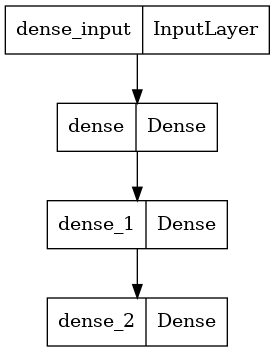

In [15]:
# graficamos el modelo
plot_model(model)

In [16]:
# numero de parametros del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                                 
 dense_2 (Dense)             (None, 3)                 9         
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


### Ejercicio 9

9.1 Compila el modelo que definiste utilizando la función de costo y [métrica](https://keras.io/api/metrics/probabilistic_metrics/) [SparseCategoricalCrossentropy](https://keras.io/api/losses/probabilistic_losses/) 

Para el optimizador puedes probar algunos de los que se indican [aquí](https://keras.io/api/optimizers/), quedate con el que te dé mejor resultados.

In [17]:
optimizer = Adam(learning_rate=0.01)
loss = SparseCategoricalCrossentropy()
acc = SparseCategoricalCrossentropy()

# Entrenamiento
model.compile(loss=loss, optimizer=optimizer, metrics=[acc])

### Ejercicio 10

9.1 Entrena el modelo utilizando el método fit()

9.2 Grafica el costo de entrenamiento y de validación con respecto a la época.

9.2 Grafica el accuracy de entrenamiento y de validación con respecto a la época.

Hint: revisa la salida del entrenamiento *history_model.history* 

In [18]:
n_epochs = 300
val_split = 0.1

# Entrenamos el modelo
history_model = model.fit(X_train, y_train,
                          epochs=n_epochs,
                          batch_size=64,
                          validation_split=val_split, 
                          shuffle=True,
                          verbose=0)

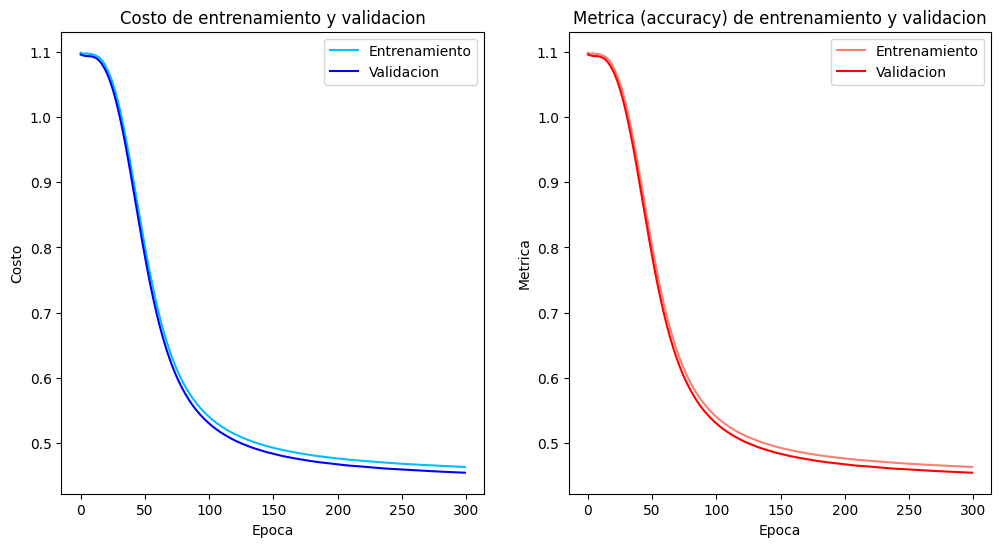

In [19]:
train_loss = history_model.history['loss']
val_loss = history_model.history['val_loss']
train_acc = history_model.history['sparse_categorical_crossentropy']
val_acc = history_model.history['val_sparse_categorical_crossentropy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Graficamos el costo y accuracy para entrenamiento y validacion (todas las epocas)
ax1.plot(train_loss, c='deepskyblue', label='Entrenamiento')
ax1.plot(val_loss, c='blue', label='Validacion')
ax1.set_title('Costo de entrenamiento y validacion')
ax1.set_xlabel('Epoca')
ax1.set_ylabel('Costo')
ax1.legend()

ax2.plot(train_acc, c='salmon', label='Entrenamiento')
ax2.plot(val_acc, c='red', label='Validacion')
ax2.set_title('Metrica (accuracy) de entrenamiento y validacion')
ax2.set_xlabel('Epoca')
ax2.set_ylabel('Metrica')
ax2.legend()

plt.show()

### Ejercicio 11

Evalúa tu modelo utilizando los datos de prueba y el método evaluate()

In [20]:
test_results = model.evaluate(X_test, y_test)
print('Test loss:', test_results[0])
print('Test accuracy:', test_results[1])

1/1 [==============================] - 0s 23ms/step - loss: 0.5917 - sparse_categorical_crossentropy: 0.5917
Test loss: 0.5917239785194397
Test accuracy: 0.5917239785194397
